In [8]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("/Users/c24102394/Desktop/PA-symptomology/Experiments/Per-day-prediction /Data/Symptomtrackingdata_csv-cleaned_with_vars.csv")

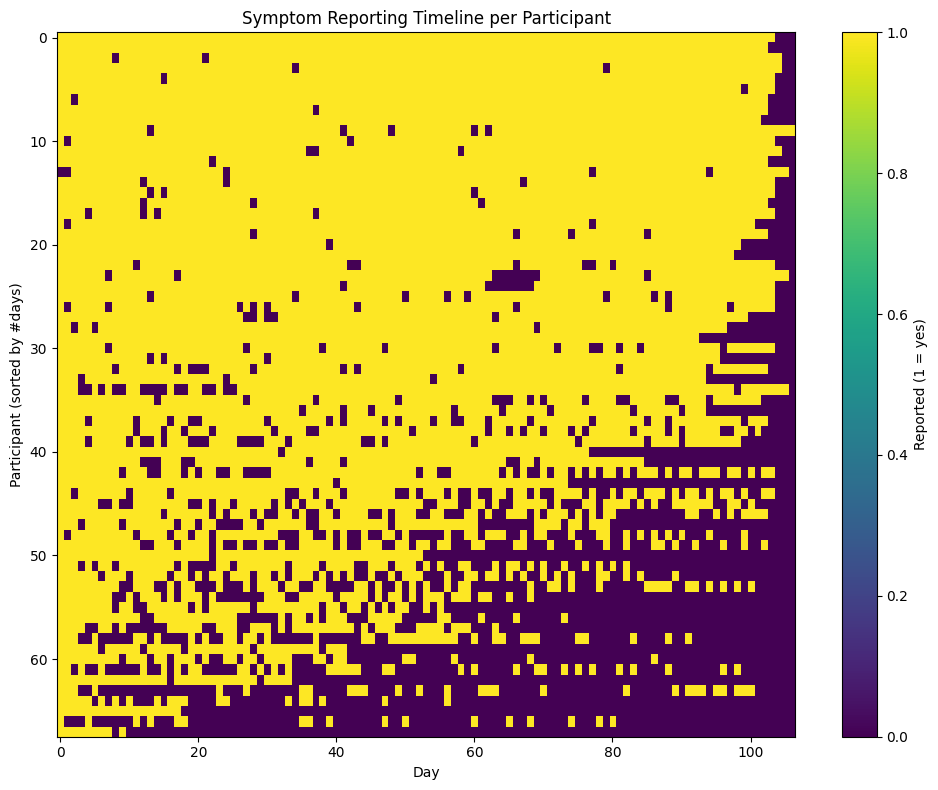

In [3]:
df = pd.read_csv("Symptomtrackingdata_csv-cleaned_with_vars.csv")df = df[['id', 'day']].dropna()
df['day'] = df['day'].astype(int)

day_counts = df.groupby('id')['day'].nunique().sort_values(ascending=False)
ordered_ids = day_counts.index

mat = (
    df.assign(present=1)
    .pivot_table(index='id', columns='day', values='present', aggfunc='max')
    .reindex(index=ordered_ids)
    .fillna(0)
    .values
)

plt.figure(figsize=(10, 8))
plt.imshow(mat, aspect='auto', interpolation='nearest')
plt.xlabel("Day")
plt.ylabel("Participant (sorted by #days)")
plt.title("Symptom Reporting Timeline per Participant")
plt.colorbar(label="Reported (1 = yes)")
plt.tight_layout()
plt.show()

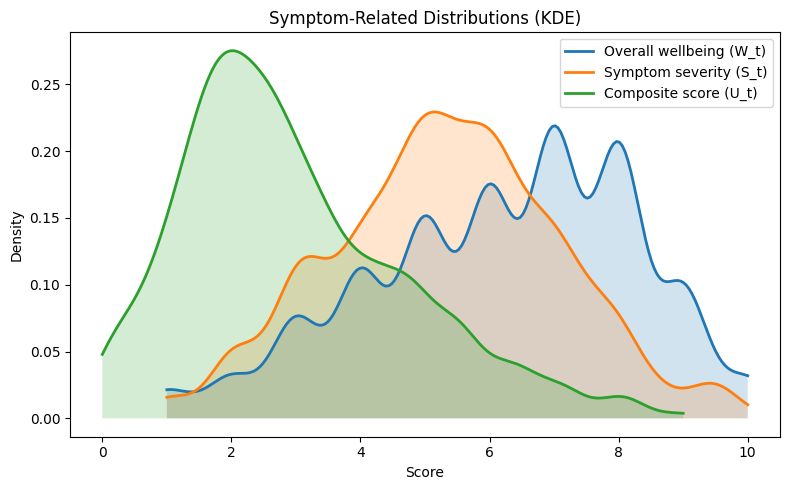

In [22]:
df = pd.read_csv("/Users/c24102394/Desktop/PA-symptomology/Experiments/Per-day-prediction /Data/Symptomtrackingdata_csv-cleaned_with_vars_ml_ready.csv")

cols = {
    "W_t": "Overall wellbeing (W_t)",
    "S_t": "Symptom severity (S_t)",
    "U_t": "Composite score (U_t)"
}

plt.figure(figsize=(8, 5))

for col, label in cols.items():
    x = df[col].dropna().values
    if len(x) < 10:
        continue
    kde = gaussian_kde(x)
    xs = np.linspace(x.min(), x.max(), 200)
    ys = kde(xs)
    plt.plot(xs, ys, linewidth=2, label=label)
    plt.fill_between(xs, ys, alpha=0.2)

plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Symptom-Related Distributions (KDE)")
plt.legend()
plt.tight_layout()
plt.show()